In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_train_path="F:\\datasets\\Fruits_Vegetables\\Fruits_Vegetables\\train"
data_test_path="F:\\datasets\\Fruits_Vegetables\\Fruits_Vegetables\\test"
data_val_path="F:\\datasets\\Fruits_Vegetables\\Fruits_Vegetables\\validation"

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [5]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False)

Found 359 files belonging to 36 classes.


In [6]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [7]:
data_ct = data_train.class_names
data_ct

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

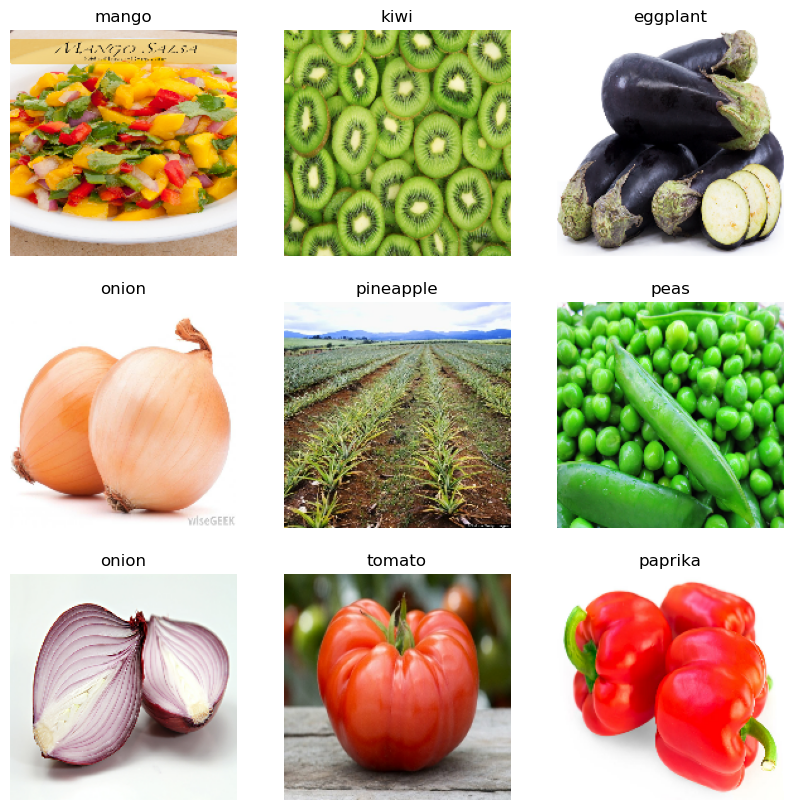

In [8]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_ct[labels[i]])
        plt.axis('off')

In [9]:
from tensorflow.keras.models import Sequential

In [10]:
data_train    

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(180,180,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_ct))])

In [12]:
#compiling
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [13]:
epochs_size = 5
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/5


98/98 [==============================] - 152s 1s/step - loss: 3.3003 - accuracy: 0.0950 - val_loss: 2.5766 - val_accuracy: 0.2051
Epoch 2/5
98/98 [==============================] - 146s 1s/step - loss: 2.5317 - accuracy: 0.2767 - val_loss: 1.8081 - val_accuracy: 0.4929
Epoch 3/5
98/98 [==============================] - 143s 1s/step - loss: 2.0349 - accuracy: 0.4064 - val_loss: 1.4577 - val_accuracy: 0.5954
Epoch 4/5
98/98 [==============================] - 145s 1s/step - loss: 1.6823 - accuracy: 0.5162 - val_loss: 0.8803 - val_accuracy: 0.7749
Epoch 5/5
98/98 [==============================] - 145s 1s/step - loss: 1.2121 - accuracy: 0.6507 - val_loss: 0.6256 - val_accuracy: 0.8291


Text(0.5, 1.0, 'Loss')

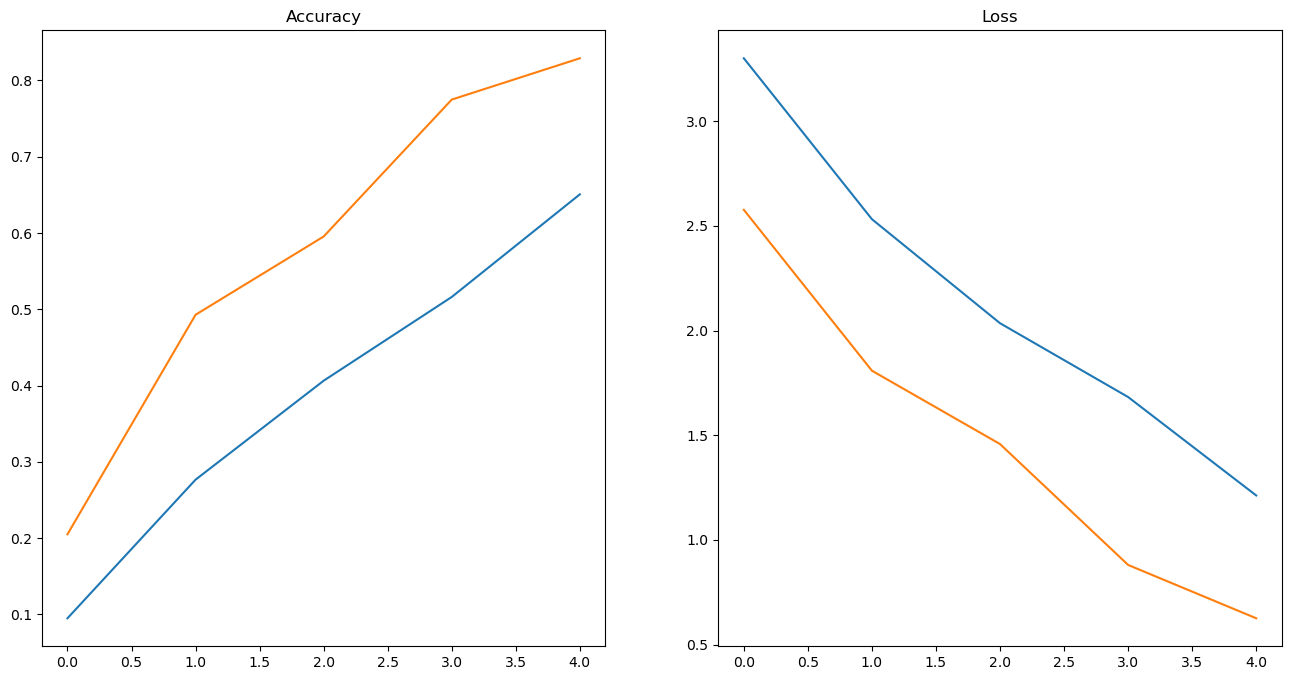

In [14]:
epochs_range = range(epochs_size)
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

#### single prediction

In [15]:
image ="F:\\datasets\\images.jpeg"
image = tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_b=tf.expand_dims(img_arr,0)

In [16]:
pred = model.predict(img_b)

1/1 [==============================] - 1s 541ms/step


In [17]:
score = tf.nn.softmax(pred)

In [35]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_ct[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is lemon with accuracy of 77.07


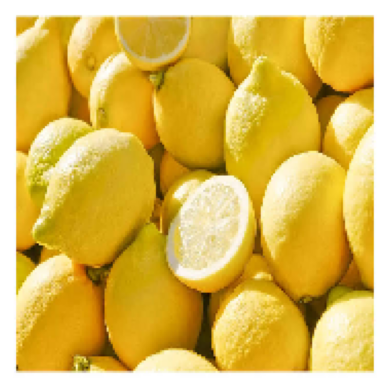

In [19]:
plt.imshow(image)
plt.axis('off')
plt.show()

### Gradio interface

In [21]:
#save the model
from tensorflow.keras.models import load_model
model.save("classification")

INFO:tensorflow:Assets written to: classification\assets


INFO:tensorflow:Assets written to: classification\assets


In [18]:
import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image

# Assuming img_height and img_width are defined
img_height, img_width = 180, 180  # Adjust these dimensions based on your model's input size

# Load the custom flower recognition model
model = tf.keras.models.load_model("C:\\Users\\katku\\OneDrive\\Desktop\\Anjali Valmiki\\classification")

# Define the labels
vegfruit_names = ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']

# Function to preprocess and classify the image
def classify_image(image):
    # Resize the image to the model's expected input size
    image = image.resize((img_width, img_height))
    img_arr = tf.keras.preprocessing.image.img_to_array(image)
    img_expanded = tf.expand_dims(img_arr, axis=0)
    
    # Make predictions using the custom flower recognition model
    predictions = model.predict(img_expanded)
    result = tf.nn.softmax(predictions[0])
    predicted_vegfruit= vegfruit_names[np.argmax(result)]
    confidence = np.max(result)
    
    # Format the result statement
    result_statement = 'Image is {}'.format(predicted_vegfruit)
    
    return result_statement, confidence

# Create a Gradio interface
iface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="pil"),
    outputs=["text", "number"],
    live=True,
    title="Fruit and Vegetable Classification",
    description="Upload an image for classification as fruit or vegetable."
)

# Launch the Gradio interface
iface.launch(inline=True)


Running on local URL:  http://127.0.0.1:7873

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 200ms/step


Traceback (most recent call last):
  File "F:\OFFICE\Lib\site-packages\gradio\queueing.py", line 495, in call_prediction
    output = await route_utils.call_process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "F:\OFFICE\Lib\site-packages\gradio\route_utils.py", line 235, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "F:\OFFICE\Lib\site-packages\gradio\blocks.py", line 1627, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "F:\OFFICE\Lib\site-packages\gradio\blocks.py", line 1173, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "F:\OFFICE\Lib\site-packages\anyio\to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

1/1 [==============================] - 0s 50ms/step


Traceback (most recent call last):
  File "F:\OFFICE\Lib\site-packages\gradio\queueing.py", line 495, in call_prediction
    output = await route_utils.call_process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "F:\OFFICE\Lib\site-packages\gradio\route_utils.py", line 235, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "F:\OFFICE\Lib\site-packages\gradio\blocks.py", line 1627, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "F:\OFFICE\Lib\site-packages\gradio\blocks.py", line 1173, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "F:\OFFICE\Lib\site-packages\anyio\to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

1/1 [==============================] - 0s 51ms/step


Traceback (most recent call last):
  File "F:\OFFICE\Lib\site-packages\gradio\queueing.py", line 495, in call_prediction
    output = await route_utils.call_process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "F:\OFFICE\Lib\site-packages\gradio\route_utils.py", line 235, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "F:\OFFICE\Lib\site-packages\gradio\blocks.py", line 1627, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "F:\OFFICE\Lib\site-packages\gradio\blocks.py", line 1173, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "F:\OFFICE\Lib\site-packages\anyio\to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

1/1 [==============================] - 0s 48ms/step


Traceback (most recent call last):
  File "F:\OFFICE\Lib\site-packages\gradio\queueing.py", line 495, in call_prediction
    output = await route_utils.call_process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "F:\OFFICE\Lib\site-packages\gradio\route_utils.py", line 235, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "F:\OFFICE\Lib\site-packages\gradio\blocks.py", line 1627, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "F:\OFFICE\Lib\site-packages\gradio\blocks.py", line 1173, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "F:\OFFICE\Lib\site-packages\anyio\to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

1/1 [==============================] - 0s 60ms/step
